In [133]:
# Calling Important Librabies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import pickle as pkl

# Ignoring Warnings
import warnings
warnings.filterwarnings("ignore")


In [134]:
# Importing Dataset
df = pd.read_csv('C:/Users/ASUS/Downloads/Documents/oil_spill.csv')

## Exploratory Data Analysis

In [135]:
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     937 non-null    int64  
 1   f_2     937 non-null    int64  
 2   f_3     937 non-null    float64
 3   f_4     937 non-null    float64
 4   f_5     937 non-null    int64  
 5   f_6     937 non-null    int64  
 6   f_7     937 non-null    float64
 7   f_8     937 non-null    float64
 8   f_9     937 non-null    float64
 9   f_10    937 non-null    float64
 10  f_11    937 non-null    float64
 11  f_12    937 non-null    float64
 12  f_13    937 non-null    float64
 13  f_14    937 non-null    float64
 14  f_15    937 non-null    float64
 15  f_16    937 non-null    float64
 16  f_17    937 non-null    float64
 17  f_18    937 non-null    float64
 18  f_19    937 non-null    float64
 19  f_20    937 non-null    float64
 20  f_21    937 non-null    float64
 21  f_22    937 non-null    float64
 22  f_

In [108]:
# Checking shape of dataset
df.shape

(937, 50)

In [109]:
# Checking Null Value
df.isnull().sum()

f_1       0
f_2       0
f_3       0
f_4       0
f_5       0
f_6       0
f_7       0
f_8       0
f_9       0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
f_31      0
f_32      0
f_33      0
f_34      0
f_35      0
f_36      0
f_37      0
f_38      0
f_39      0
f_40      0
f_41      0
f_42      0
f_43      0
f_44      0
f_45      0
f_46      0
f_47      0
f_48      0
f_49      0
target    0
dtype: int64

<I>From the above, we can clearly see that,</I>
1) The DataFrame consists mostly of floating-point features with fewer integer features.
2) All columns, including the target variable, have complete data with no missing values.

In [110]:
# Checking Duplicate values
df.duplicated().sum()

0

In [111]:
# Checking Unique Value
unique = df.nunique() 
print(unique) 

f_1       238
f_2       297
f_3       927
f_4       933
f_5       179
f_6       375
f_7       820
f_8       618
f_9       561
f_10       57
f_11      577
f_12       59
f_13       73
f_14      107
f_15       53
f_16       91
f_17      893
f_18      810
f_19      170
f_20       53
f_21       68
f_22        9
f_23        1
f_24       92
f_25        9
f_26        8
f_27        9
f_28      308
f_29      447
f_30      392
f_31      107
f_32       42
f_33        4
f_34       45
f_35      141
f_36      110
f_37        3
f_38      758
f_39        9
f_40        9
f_41      388
f_42      220
f_43      644
f_44      649
f_45      499
f_46        2
f_47      937
f_48      169
f_49      286
target      2
dtype: int64


<B>Applying value count function on those features which have single digit unique value.

In [112]:
df['f_22'].value_counts()

f_22
55.85     204
75.26     184
85.22     135
67.87     103
69.09      85
47.66      79
123.47     74
126.08     62
87.65      11
Name: count, dtype: int64

In [113]:
df['f_23'].value_counts()

f_23
0    937
Name: count, dtype: int64

In [114]:
df['f_25'].value_counts()

f_25
221.97     204
351.67     184
422.12     135
421.21     103
239.69      85
204.34      79
2036.80     74
2025.42     62
132.78      11
Name: count, dtype: int64

In [115]:
df['f_26'].value_counts()

f_26
 0.18    269
 0.87    204
 1.01    135
 1.83    103
 0.97     79
-0.71     74
-0.53     62
-0.01     11
Name: count, dtype: int64

In [116]:
df['f_27'].value_counts()

f_27
5.07     204
9.24     184
12.06    135
14.78    103
3.83      85
4.66      79
2.96      74
3.01      62
3.78      11
Name: count, dtype: int64

In [117]:
df['f_33'].value_counts()

f_33
0.00    933
0.87      2
0.01      1
0.86      1
Name: count, dtype: int64

In [118]:
df['f_37'].value_counts()

f_37
0.01    580
0.00    324
0.02     33
Name: count, dtype: int64

In [119]:
df['f_39'].value_counts()

f_39
82     204
78     184
85     135
64     103
102     85
99      79
143     74
133     62
89      11
Name: count, dtype: int64

In [120]:
df['f_40'].value_counts()

f_40
50    204
55    184
63    135
39    103
73     85
67     79
86     74
85     62
69     11
Name: count, dtype: int64

In [121]:
df['f_46'].value_counts()

f_46
0    817
1    120
Name: count, dtype: int64

In [122]:
df['target'].value_counts()

target
0    896
1     41
Name: count, dtype: int64

It's likely safe to delete `f_23` and `f_33` since they don't provide any or very little information for model building.

In [136]:
# Removing f_23 and f_33
df.drop(columns=['f_23', 'f_33'], axis=1, inplace=True)

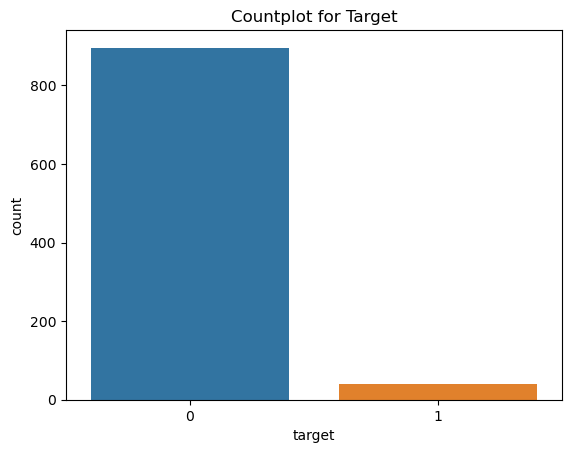

In [137]:
# Plotting Bar plot on Dependent feature
sns.countplot(x=df['target'])
plt.title('Countplot for Target')
plt.show()


It is clear that the `target` feature is highly imbalanced and heavily weighted towards `Category 0`. This imbalanced data could lead to biased models that may not perform well in `Category 1` (minority class).

In [138]:
df.describe()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
count,937.000000,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,81.588047,332.842049,698.707086,870.992209,84.121665,7.696964e+05,43.242721,9.127887,3940.712914,0.221003,...,933.928677,427.565582,255.435902,106.112519,5.014002,0.128068,7985.718004,61.694386,8.119723,0.043757
std,64.976730,1931.938570,599.965577,522.799325,45.361771,3.831151e+06,12.718404,3.588878,8167.427625,0.090316,...,1001.681331,715.391648,534.306194,135.617708,5.029151,0.334344,6854.504915,10.412807,2.908895,0.204662
min,1.000000,10.000000,1.920000,1.000000,0.000000,7.031200e+04,21.240000,0.830000,667.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2051.500000,35.950000,5.810000,0.000000
25%,31.000000,20.000000,85.270000,444.200000,54.000000,1.250000e+05,33.650000,6.750000,1371.000000,0.160000,...,450.000000,180.000000,90.800000,50.120000,2.370000,0.000000,3760.570000,65.720000,6.340000,0.000000
50%,64.000000,65.000000,704.370000,761.280000,73.000000,1.863000e+05,39.970000,8.200000,2090.000000,0.200000,...,685.420000,270.000000,161.650000,73.850000,3.850000,0.000000,5509.430000,65.930000,7.220000,0.000000
75%,124.000000,132.000000,1223.480000,1260.370000,117.000000,3.304680e+05,52.420000,10.760000,3435.000000,0.260000,...,1053.420000,460.980000,265.510000,125.810000,6.320000,0.000000,9521.930000,66.130000,7.840000,0.000000
max,352.000000,32389.000000,1893.080000,2724.570000,180.000000,7.131500e+07,82.640000,24.690000,160740.000000,0.740000,...,11949.330000,11500.000000,9593.480000,1748.130000,76.630000,1.000000,55128.460000,66.450000,15.440000,1.000000


#### Feature Correlation

In [139]:
corr = df.corr() 
styled_corr = corr.style.background_gradient(cmap='Blues').format(precision=2)
styled_corr

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
f_1,1.00,-0.16,0.17,-0.10,-0.02,-0.17,-0.04,-0.20,-0.24,-0.21,-0.26,-0.21,-0.22,-0.22,-0.14,-0.18,0.06,0.03,0.04,-0.16,-0.17,-0.24,0.03,-0.26,0.40,0.40,-0.17,-0.16,0.24,0.04,-0.09,-0.09,-0.23,-0.22,0.28,-0.26,-0.45,-0.50,-0.29,-0.17,-0.16,-0.14,-0.14,-0.16,-0.20,0.29,-0.25,-0.18
f_2,-0.16,1.00,0.06,0.05,-0.04,0.95,-0.14,-0.02,0.83,0.13,0.75,0.00,0.02,0.18,-0.12,0.24,0.24,0.32,0.02,-0.05,-0.06,0.14,-0.14,0.13,-0.09,-0.01,0.09,0.17,-0.16,0.01,0.12,0.12,0.87,0.87,-0.15,0.44,0.08,0.07,0.56,0.78,0.80,0.72,-0.08,-0.05,0.12,-0.13,0.14,0.03
f_3,0.17,0.06,1.00,0.55,-0.08,0.05,-0.63,-0.35,0.16,0.07,-0.06,-0.08,0.04,0.30,-0.30,0.44,-0.00,-0.05,0.60,-0.19,-0.03,0.30,-0.67,0.06,-0.01,0.63,-0.12,0.01,-0.37,-0.10,0.59,0.59,0.18,0.18,0.25,0.33,-0.28,-0.17,0.19,0.18,0.13,0.18,-0.09,-0.18,-0.02,0.05,0.16,-0.04
f_4,-0.10,0.05,0.55,1.00,0.05,0.02,-0.55,-0.22,0.10,0.20,-0.08,0.11,0.22,0.34,-0.04,0.37,-0.00,-0.02,0.49,-0.01,0.13,0.62,-0.67,0.47,-0.50,0.12,0.11,0.17,-0.55,-0.36,0.69,0.69,0.15,0.15,0.28,0.26,0.28,0.34,-0.05,0.03,0.02,0.00,-0.22,-0.20,0.11,-0.39,0.48,-0.05
f_5,-0.02,-0.04,-0.08,0.05,1.00,-0.03,0.06,0.12,-0.05,0.10,-0.08,0.01,0.01,-0.02,0.03,-0.03,0.05,0.07,-0.07,0.05,0.03,0.12,0.00,0.13,-0.11,-0.11,0.14,0.05,-0.09,-0.18,0.06,0.06,-0.04,-0.04,0.10,-0.01,0.20,0.23,-0.07,-0.01,-0.01,-0.01,-0.08,-0.08,0.07,-0.14,0.12,-0.08
f_6,-0.17,0.95,0.05,0.02,-0.03,1.00,-0.09,-0.00,0.89,0.10,0.77,-0.03,-0.02,0.16,-0.15,0.23,0.30,0.41,0.05,-0.08,-0.08,0.08,-0.10,0.06,-0.04,0.01,0.05,0.12,-0.10,0.06,0.06,0.06,0.88,0.89,-0.18,0.48,0.02,0.02,0.59,0.84,0.87,0.77,-0.08,-0.05,0.13,-0.06,0.07,0.05
f_7,-0.04,-0.14,-0.63,-0.55,0.06,-0.09,1.00,0.38,-0.19,-0.38,0.09,-0.36,-0.48,-0.57,-0.12,-0.56,-0.01,0.03,-0.13,-0.22,-0.39,-0.61,0.91,-0.57,0.14,-0.39,-0.15,-0.28,0.73,0.23,-0.82,-0.82,-0.25,-0.24,-0.39,-0.38,-0.13,-0.05,-0.12,-0.10,-0.07,-0.07,0.08,0.09,-0.16,0.48,-0.61,-0.03
f_8,-0.20,-0.02,-0.35,-0.22,0.12,-0.00,0.38,1.00,0.00,0.67,0.17,0.41,0.29,0.18,0.34,0.05,-0.25,-0.19,-0.25,0.51,0.36,-0.09,0.36,0.04,-0.17,-0.46,0.35,0.18,0.08,-0.01,-0.24,-0.24,-0.02,-0.02,-0.25,-0.09,0.30,0.28,0.01,-0.02,-0.01,0.00,-0.06,-0.05,-0.03,-0.10,0.03,-0.01
f_9,-0.24,0.83,0.16,0.10,-0.05,0.89,-0.19,0.00,1.00,0.16,0.67,-0.01,0.02,0.26,-0.22,0.37,0.16,0.21,0.09,-0.08,-0.07,0.12,-0.19,0.10,-0.04,0.08,0.06,0.15,-0.17,0.07,0.17,0.17,0.98,0.98,-0.21,0.78,0.00,0.00,0.68,0.78,0.77,0.74,-0.07,-0.05,0.10,-0.08,0.11,0.08
f_10,-0.21,0.13,0.07,0.20,0.10,0.10,-0.38,0.67,0.16,1.00,0.10,0.75,0.73,0.65,0.50,0.49,-0.23,-0.20,-0.19,0.73,0.72,0.47,-0.36,0.58,-0.38,-0.25,0.55,0.51,-0.54,-0.23,0.43,0.43,0.20,0.20,0.09,0.22,0.52,0.42,0.08,0.05,0.04,0.04,-0.11,-0.10,0.11,-0.59,0.60,-0.01


## Preprocessing Of Dataset

#### Selecting Indepedent and Denpendent Features

In [140]:
x = df.drop(['target'],axis=1)
y = df['target']

#### Handling Imbalanced Dataset - Applying Oversampling

In [141]:
smt = SMOTETomek(random_state=42)
x,y = smt.fit_resample(x,y)

#### Splitting the Independent and Dependent dataset into training and testing

In [142]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 45)

#### Feature Scaling

In [146]:
# StandardScaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### Retriving correlation between features 

In [151]:
# Calculating VIF
x_vif = pd.DataFrame(x_train_scaled , columns=x_train.columns)
vif = pd.DataFrame()
vif['Variable'] = x_vif.columns
vif['VIF'] = [variance_inflation_factor(x_vif, i) for i in range(x_vif.shape[1])]
print(vif[vif['VIF'] > 5])

   Variable          VIF
1       f_2    78.043820
2       f_3    22.891268
3       f_4     8.610099
5       f_6   239.673515
6       f_7    81.470668
7       f_8    33.177405
8       f_9   335.872508
9      f_10    35.284085
10     f_11    18.847753
11     f_12    60.039993
12     f_13    79.326995
13     f_14  2096.890483
14     f_15   345.103500
15     f_16  1857.297763
16     f_17    14.496117
17     f_18    20.978604
18     f_19    84.718129
19     f_20    63.853560
20     f_21    82.758687
21     f_22   283.632562
22     f_24   235.886994
23     f_25  6577.160292
24     f_26   372.346060
25     f_27   679.022196
28     f_30    11.910900
30     f_32   245.131952
31     f_34   207.529637
32     f_35  1756.671443
33     f_36  1343.498473
35     f_38    30.423508
36     f_39   304.275130
37     f_40   134.701604
38     f_41     9.348016
39     f_42   202.088289
40     f_43   108.839016
41     f_44    35.261619
45     f_48  6497.917977
46     f_49   303.695479


The correlation between these features is extremely high, which indicates that they are highly correlated with one or more other features in the dataset. Combining these correlated features using PCA (Principal Component Analysis) into few features can ensure that the model captures essential information without losing data, instead of removing the correlated features.

#### Introducing Dimensionality Reduction

In [148]:
# Finding the number for n_components which can capture 95% of variance 
pca = PCA().fit(x_train_scaled)
variance = np.cumsum(pca.explained_variance_ratio_)
pc = np.argmax(variance >= 0.99) + 1
print("Principal component's number that explain 99% variance =>",pc)

# PCA() with optimal number of components
pca = PCA(n_components = pc)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

Principal component's number that explain 99% variance => 26


In the `Scaling` and `Reducing Dimension` feature, you can observe that I separated the `training data` and `testing data` instead of including the entire `Independent feature` dataset in these preprocessing steps to avoid information from the test set seeping into the training process.

## Model Building

#### Logistic Regression

In [172]:
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)

LogisticRegression()

In [173]:
# Calculating Score
print('Training Score :',lr.score(x_train_scaled,y_train))
print('Testing Score :',lr.score(x_test_scaled,y_test),'\n')

# Performance Evaluation
y_pred_lr = lr.predict(x_test_scaled)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_lr))
print("\nModel Accuaracy Score:",accuracy_score(y_test,y_pred_lr))
print("\nClassification Report:\n",classification_report(y_test,y_pred_lr))

Training Score : 0.9695550351288056
Testing Score : 0.9648711943793911 

Confusion Matrix:
 [[204   9]
 [  6 208]]

Model Accuaracy Score: 0.9648711943793911

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       213
           1       0.96      0.97      0.97       214

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



#### Applying Regularization Techniques of Logistic Regression

#### Ridge (L2)

In [168]:
ridge = LogisticRegression(penalty='l2', solver='liblinear', random_state=45)
ridge.fit(x_train_scaled, y_train)

LogisticRegression(random_state=45, solver='liblinear')

In [169]:
# Calculating Score
print('Training Score :',ridge.score(x_train_scaled,y_train))
print('Testing Score :',ridge.score(x_test_scaled,y_test),'\n')

# Performance Evalution
y_pred_ridge = ridge.predict(x_test_scaled)
print("Confusion Matrix:") 
print(confusion_matrix(y_test, y_pred_ridge))
print("\nModel Accuracy Score :", accuracy_score (y_test, y_pred_ridge))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ridge))


Training Score : 0.9695550351288056
Testing Score : 0.9648711943793911 

Confusion Matrix:
[[204   9]
 [  6 208]]

Model Accuracy Score : 0.9648711943793911

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       213
           1       0.96      0.97      0.97       214

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



#### Lasso (L1) 

In [170]:
lasso = LogisticRegression(penalty='l1',solver='liblinear',random_state=45)
lasso.fit(x_train_scaled,y_train)

LogisticRegression(penalty='l1', random_state=45, solver='liblinear')

In [171]:
# Calculating Score
print('Training Score :',lasso.score(x_train_scaled,y_train))
print('Testing Score :',lasso.score(x_test_scaled,y_test),'\n')

# Performance Evaluation
y_pred_lasso = lasso.predict(x_test_scaled)
print("Confusion Matrix:") 
print(confusion_matrix(y_test, y_pred_lasso))
print("\nModel Accuracy Score :", accuracy_score (y_test, y_pred_lasso))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lasso))

Training Score : 0.9718969555035128
Testing Score : 0.9672131147540983 

Confusion Matrix:
[[204   9]
 [  5 209]]

Model Accuracy Score : 0.9672131147540983

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       213
           1       0.96      0.98      0.97       214

    accuracy                           0.97       427
   macro avg       0.97      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427



#### KNN Classifier

In [175]:
# Hyperparameter Tuning
value_knc = {'n_neighbors': [3,5,7],'weights': ['uniform', 'distance'], 'p': [1,2]}
knc = KNeighborsClassifier()
grid_knc = GridSearchCV(estimator=knc, param_grid = value_knc, cv = 20, scoring = 'accuracy')
grid_knc.fit(x_train_pca, y_train)

# Constructing Model
knc = grid_knc.best_estimator_
knc.fit(x_train_pca, y_train)

KNeighborsClassifier(n_neighbors=3)

In [176]:
# Calculating Score
print('Training Score :',knc.score(x_train_pca,y_train))
print('Testing Score :',knc.score(x_test_pca,y_test),'\n')

# Performance Evaluation
y_pred_neighbor = knc.predict(x_test_pca)
print("Confusion Matrix:") 
print(confusion_matrix(y_test, y_pred_neighbor))
print("\nAccuracy Score :", accuracy_score (y_test, y_pred_neighbor))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_neighbor))

Training Score : 0.9867291178766588
Testing Score : 0.9718969555035128 

Confusion Matrix:
[[202  11]
 [  1 213]]

Accuracy Score : 0.9718969555035128

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       213
           1       0.95      1.00      0.97       214

    accuracy                           0.97       427
   macro avg       0.97      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427



#### Decision Tree Classifier

In [177]:
# Hyperparameter Tuning
value_dt = {'criterion': ['gini', 'entropy'],'max_depth': [3,5,7,11], 'min_samples_split': [2,5,10,20]}
dt = DecisionTreeClassifier(random_state = 40)
grid_dt = GridSearchCV(dt, param_grid = value_dt, cv = 20, scoring = 'accuracy')
grid_dt.fit(x_train_pca,y_train)

# Constructing Model
dt = grid_dt.best_estimator_
dt.fit(x_train_pca,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=5,
                       random_state=40)

In [178]:
# Calculating Score
print('Training Score :',dt.score(x_train_pca,y_train))
print('Testing Score :',dt.score(x_test_pca,y_test),'\n')

# Performance Evaluation
y_pred_dt = dt.predict(x_test_pca)
print("Confusion Matrix:") 
print(confusion_matrix(y_test, y_pred_dt))
print("\nModel Accuracy Score:", accuracy_score (y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Training Score : 0.9984387197501952
Testing Score : 0.955503512880562 

Confusion Matrix:
[[203  10]
 [  9 205]]

Model Accuracy Score: 0.955503512880562

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       213
           1       0.95      0.96      0.96       214

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



#### Random Forest Classifier 

In [179]:
# Hyperparameter Tuning
value_rf = {'n_estimators': [50,100,200],'max_depth': [10,20,30], 'min_samples_split': [2,5,10]}
rf = RandomForestClassifier(random_state = 40)
grid_rf = GridSearchCV(estimator = rf, param_grid = value_rf, cv = 20, scoring = 'accuracy')
grid_rf.fit(x_train_pca,y_train)

# Constructing Model
rf = grid_rf.best_estimator_
rf.fit(x_train_pca,y_train)

RandomForestClassifier(max_depth=20, n_estimators=50, random_state=40)

In [180]:
# Calculating Score
print('Training Score :',rf.score(x_train_pca,y_train))
print('Testing Score :',rf.score(x_test_pca,y_test),'\n')

# Performance Evaluation
y_pred_rf = rf.predict(x_test_pca)
print("Confusion Matrix:") 
print(confusion_matrix(y_test, y_pred_rf))
print("\nModel Accuracy Score:", accuracy_score (y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Training Score : 1.0
Testing Score : 0.9953161592505855 

Confusion Matrix:
[[213   0]
 [  2 212]]

Model Accuracy Score: 0.9953161592505855

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       213
           1       1.00      0.99      1.00       214

    accuracy                           1.00       427
   macro avg       1.00      1.00      1.00       427
weighted avg       1.00      1.00      1.00       427



#### XGBoost Classifier

In [181]:
# Hyperparameter Tuning
value_xgb = {'n_estimators': [100, 150, 200],'max_depth': [3, 5, 7],'learning_rate': [0.01, 0.1, 1]}
xgb = XGBClassifier(random_state = 40)
grid_xgb = GridSearchCV(estimator = xgb, param_grid = value_xgb, cv = 20, scoring = 'accuracy')
grid_xgb.fit(x_train_pca, y_train)

# Constructing Model
xgb = grid_xgb.best_estimator_
xgb.fit(x_train_pca,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=40, ...)

In [182]:
# Calculating Score
print('Training Score :',xgb.score(x_train_pca,y_train))
print('Testing Score :',xgb.score(x_test_pca,y_test),'\n')

# Performance Evaluation
y_pred_xgb = xgb.predict(x_test_pca)
print("Confusion Matrix:") 
print(confusion_matrix(y_test, y_pred_xgb))
print("\nModel Accuracy Score:", accuracy_score (y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

Training Score : 1.0
Testing Score : 0.9953161592505855 

Confusion Matrix:
[[213   0]
 [  2 212]]

Model Accuracy Score: 0.9953161592505855

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       213
           1       1.00      0.99      1.00       214

    accuracy                           1.00       427
   macro avg       1.00      1.00      1.00       427
weighted avg       1.00      1.00      1.00       427



#### AdaBoost Classifier

In [183]:
# Hyperparameter Tuning
value_ada = {'n_estimators': [80, 90, 100],'learning_rate': [0.01, 0.1, 1],'base_estimator__max_depth': [None,1, 2, 3]}
ada = AdaBoostClassifier(base_estimator = dt,random_state = 40)
grid_ada= GridSearchCV(estimator = ada, param_grid = value_ada, cv = 20, scoring = 'accuracy')
grid_ada.fit(x_train, y_train)

# Constructing Model
ada = grid_ada.best_estimator_
ada.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=3,
                                                         min_samples_split=5,
                                                         random_state=40),
                   learning_rate=1, n_estimators=100, random_state=40)

In [184]:
# Calculating Score
print('Training Score :',ada.score(x_train,y_train))
print('Testing Score :',ada.score(x_test,y_test),'\n')

# Performance Evaluation
y_pred_ada = ada.predict(x_test)
print("Confusion Matrix:") 
print(confusion_matrix(y_test, y_pred_ada))
print("\nModel Accuracy Score:", accuracy_score (y_test, y_pred_ada))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada))

Training Score : 1.0
Testing Score : 0.9882903981264637 

Confusion Matrix:
[[210   3]
 [  2 212]]

Model Accuracy Score: 0.9882903981264637

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       213
           1       0.99      0.99      0.99       214

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



In [185]:
# Obtaining all Models with their accuracy score
model_accuracy = {'Logistic Regression': accuracy_score(y_test,y_pred_lr),
    'Ridge (L2) Logistic Regression': accuracy_score(y_test, y_pred_ridge),
    'Lasso (L1) Logistic Regression': accuracy_score(y_test, y_pred_lasso),
    'K-Nearest Neighbors (KNN)': accuracy_score(y_test, y_pred_neighbor),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'XGBoost': accuracy_score(y_test, y_pred_xgb),
    'AdaBoost': accuracy_score(y_test, y_pred_ada)}


for model, score in model_accuracy.items():
    print(f'{model}: {score:.3f}')

Logistic Regression: 0.965
Ridge (L2) Logistic Regression: 0.965
Lasso (L1) Logistic Regression: 0.967
K-Nearest Neighbors (KNN): 0.972
Decision Tree: 0.956
Random Forest: 0.995
XGBoost: 0.995
AdaBoost: 0.988


It is evident that `Random Forest` and `XGBoost possess` the highest accuracy score of `0.995` out of all models. Whereas, compared to the other models, the Decision Tree model had the lowest score of 0.956 and was slightly overfitted.</br>
<I>`XGBoost` is my preference over Random Forest due to its higher accuracy and efficiency. 

#### Saving the Model

In [212]:
pkl.dump(xgb,open('Oil_spill.pkl','wb'))

#### Load the Model

In [213]:
model = pkl.load(open('Oil_spill.pkl','rb'))

#### Applying Saved Model

In [214]:
# Creating New Dataset of 20 data points from Original Dataset
df1 = df.sample(n = 20, random_state = 7)
# Splitting Independent and Dependent Variables
df1_x = df1.drop(['target'],axis=1)
df1_y = df1['target']
# Scaling
df1 = scaler.transform(df1_x)
# PCA
pca = PCA(n_components=26)
pca.fit(x)
df1_pca = pca.transform(df1_x)
# Prediction through Load Model
df1_pred = model.predict(df1_pca)
print("Sample dataset Pridiction =>",df1_pred)

Sample dataset Pridiction => [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
